# Bayesian Classifier

- Consider G=4 different classes with prior probabilities p(C=c), for c=1...G. Objects $x_{c,n}$ for $n=1...N_c$ from each class are distributed according to multivariate Normal distributions with means $\mu_c$ and covariance matrices $\Sigma_c$, for c=1...G. 
- Create discriminat functions $g_c(x)=p(C=c|X=x)$ according to Bayesian approach. 

In [9]:
clear all; close all;
%%
G = 4;  % # of classes
D = 2;  % # of dimension
Nc = 100;    % number of data points
prior = 1/4*ones(1,4);
mu = [2 3;1 2;1.4 2.9;2 3.8];
SIGMA(:,:,1) = [1 1.5;1.5 3];
SIGMA(:,:,2) = [4 2;2 3];
SIGMA(:,:,3) = [2 3;3 4];
SIGMA(:,:,4) = [8 2;2 4];

## Generate random training data from a multivariate distribution

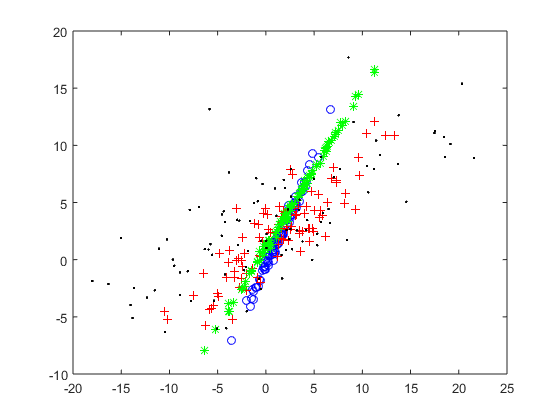

In [6]:
col = {'bo','r+','g*','k.'};
figure,
for c=1:G
    x(:,:,c) = mvnrnd(mu(c,:),SIGMA(:,:,c)*SIGMA(:,:,c)',Nc);
    plot(x(:,1,c),x(:,2,c),col{c})
    hold on
end
hold off

## Training Phase

In [7]:
% compute parameters of fitted multivariate gaussians
muhat1 = sum(x(:,:,1),1)./Nc;
muhat2 = sum(x(:,:,2),1)./Nc;
muhat3 = sum(x(:,:,3),1)./Nc;
muhat4 = sum(x(:,:,4),1)./Nc;

SIGMAhat1 = zeros(2);
SIGMAhat2 = zeros(2);
SIGMAhat3 = zeros(2);
SIGMAhat4 = zeros(2);

for n=1:Nc
    SIGMAhat1 =  SIGMAhat1 + (x(n,:,1)-muhat1)'*(x(n,:,1)-muhat1);
    SIGMAhat2 =  SIGMAhat2 + (x(n,:,2)-muhat2)'*(x(n,:,2)-muhat2);
    SIGMAhat3 =  SIGMAhat3 + (x(n,:,3)-muhat3)'*(x(n,:,3)-muhat3);
    SIGMAhat4 =  SIGMAhat4 + (x(n,:,4)-muhat4)'*(x(n,:,4)-muhat4);
end

SIGMAhat1 = SIGMAhat1./Nc;
SIGMAhat2 = SIGMAhat2./Nc;
SIGMAhat3 = SIGMAhat3./Nc;
SIGMAhat4 = SIGMAhat4./Nc;

## Test Phase

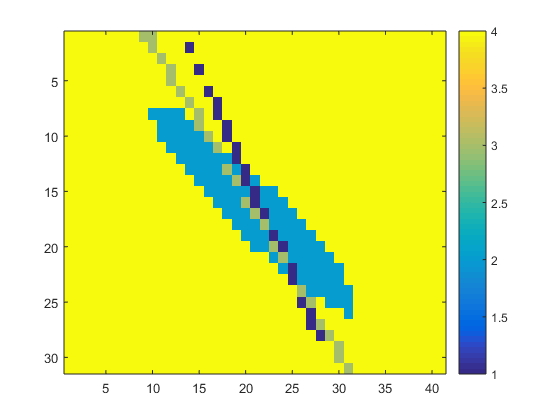

In [8]:
% Generate Test data
X1values = [-20:20];
X2values = [-15:15];
[X1,X2] = meshgrid(X1values,X2values);
X = [X1(:) X2(:)];

likelihood1 = mvnpdf(X,muhat1,SIGMAhat1);
likelihood2 = mvnpdf(X,muhat2,SIGMAhat2);
likelihood3 = mvnpdf(X,muhat3,SIGMAhat3);
likelihood4 = mvnpdf(X,muhat4,SIGMAhat4);

L = [likelihood1*prior(1) likelihood2*prior(2) likelihood3*prior(3) likelihood4*prior(4)];
[~,decisions] = max(L,[],2);

Gimage = reshape(decisions,length(X2values),length(X1values));
figure, imagesc(Gimage), colorbar

# Discriminant Function

- Consider two classes with prior probabilities p(C=1) and p(C=2) and data vectors ($x_{c,n}$, for $n=1...N_c$) from each class are distributed according to multivariate Normal distribution.

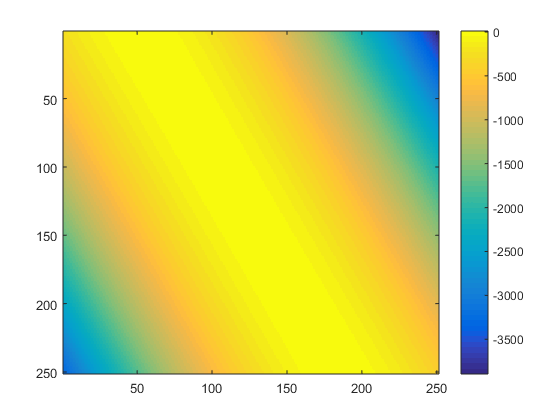

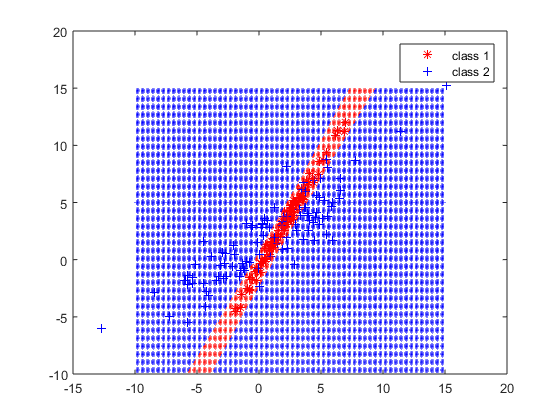

In [10]:

P1 = 0.5;   % P(C=1)
P2 = 0.5;   % P(C=2)
mu1 = [2 3]';
mu2 = [1 2]';
SIG1 = [1 1.5;1.5 3]*[1 1.5;1.5 3]';
SIG2 = [4 2;2 3]*[4 2;2 3]';
%SIG2 = SIG1;
% Generate random training data
trndata1 = mvnrnd(mu1,SIG1,100);
trndata2 = mvnrnd(mu2,SIG2,100);

X1val = -10:0.1:15;
X2val = -10:0.1:15;
[X1,X2] = meshgrid(X1val,X2val);
X = [X1(:) X2(:)]';


A = 0.5*(inv(SIG2) - inv(SIG1));
B = mu1'*inv(SIG1) - mu2'*inv(SIG2);
% C = 0.5*log(abs(SIG2))-0.5*log(abs(SIG1)) + log(P1/P2) + 0.5*mu2'*inv(SIG2)*mu2 + 0.5*mu1'*inv(SIG1)*mu1;
C = 0.5*log(det(SIG2)/det(SIG1)) + log(P1/P2) + 0.5*mu2'*inv(SIG2)*mu2 + 0.5*mu1'*inv(SIG1)*mu1;

g = sum((X'*A).*X',2) + [B*X]' + C;   % quadratic discriminant function
gclass = double(g > 0); 

figure,
plot(trndata1(:,1),trndata1(:,2),'r*',trndata2(:,1),trndata2(:,2),'b+')
hold on
gscatter(X(1,:),X(2,:),gclass,'br','.',1,'off');
legend('class 1','class 2')

Gimage = reshape(g,length(X1val),length(X2val));
figure, imagesc(Gimage), colorbar